In [1]:
import pandas as pd
import geopandas as gpd
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Data Imports


Ethnicity: `csv` is stacked so need to use [pivot](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)
Has results in terms of national population (i.e. total number of that ethnicity in the country) vs. the local share of population of that ethnicity. Using local share

In [8]:
covid_df= pd.read_csv("../../data/interim/clean_fbook_covid_deaths.csv", index_col=4)
ethnicity_df= pd.read_csv("../../data/interim/clean_ethnicity_2011.csv", index_col=1)

# Joining race and covid deaths



In [3]:
df = covid_df.join(ethnicity_df)
df[list(df.columns[33:])]

,2020-06-04 00:00:00,Geography_code,Denominator,Arab,Asian,Asian Other,Bangladeshi,Black,Black African,Black Caribbean,...,Mixed White and Black African,Mixed White and Black Caribbean,Other,Other ethnic group,Pakistani,White,White British,White Gypsy or Irish Traveller,White Irish,White Other
LTLA Name,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,499.0,E09000002,185911.0,0.52,15.92,2.76,4.14,19.98,15.43,2.81,...,1.14,1.44,1.57,1.04,4.31,58.30,49.46,0.10,0.93,7.81
Barnet,1299.0,E09000003,356386.0,1.46,18.50,6.22,0.62,7.70,5.44,1.25,...,0.87,0.87,4.86,3.40,1.50,64.13,45.49,0.04,2.44,16.16
Bexley,727.0,E09000004,231997.0,0.13,6.57,1.80,0.33,8.46,6.88,1.03,...,0.42,0.72,0.76,0.63,0.31,81.88,77.26,0.27,1.12,3.23
Brent,1477.0,E09000005,311215.0,3.67,34.06,9.19,0.56,18.84,7.84,7.62,...,0.91,1.38,5.77,2.09,4.62,36.27,17.96,0.10,3.96,14.25
Bromley,1282.0,E09000006,309392.0,0.28,5.19,1.55,0.41,6.04,3.17,2.14,...,0.43,1.26,0.93,0.65,0.33,84.32,77.40,0.19,1.44,5.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ceredigion,42.0,W06000008,75922.0,0.26,1.45,0.31,0.12,0.35,0.22,0.11,...,0.10,0.26,0.50,0.24,0.11,96.73,93.14,0.10,0.63,2.86
Pembrokeshire,279.0,W06000009,122439.0,0.05,0.97,0.39,0.08,0.15,0.08,0.04,...,0.06,0.19,0.17,0.12,0.06,98.11,95.63,0.37,0.68,1.42
Powys,287.0,W06000023,132976.0,0.02,0.86,0.56,0.05,0.10,0.03,0.05,...,0.06,0.16,0.09,0.07,0.01,98.38,96.09,0.10,0.38,1.82


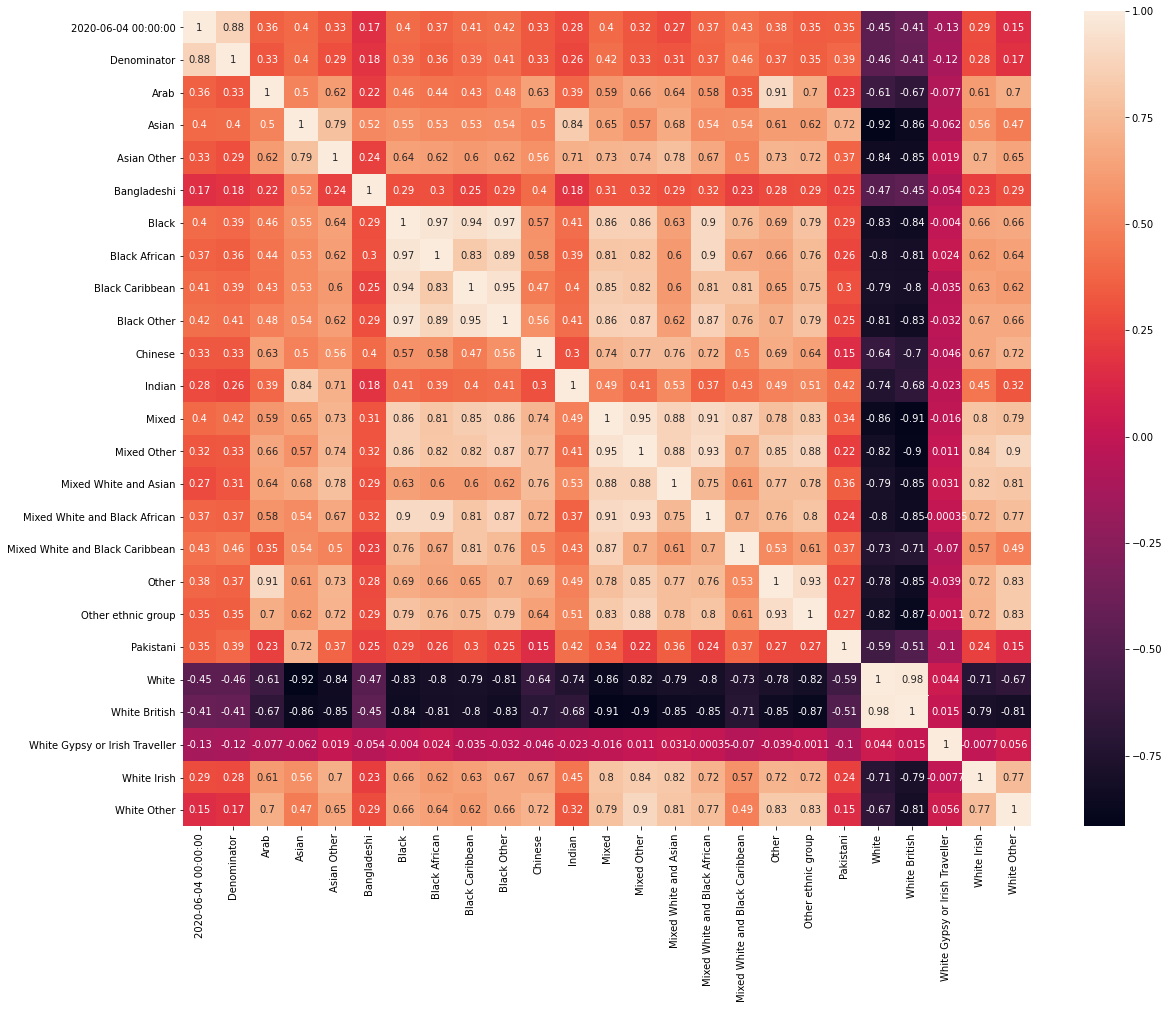

<Figure size 432x288 with 0 Axes>

In [4]:
#correlation matrix of relevant variables
plt.figure(figsize=(19, 15))
corrMatrix = df[list(df.columns[33:])].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
plt.savefig("../reports/figures/corrmat.png")

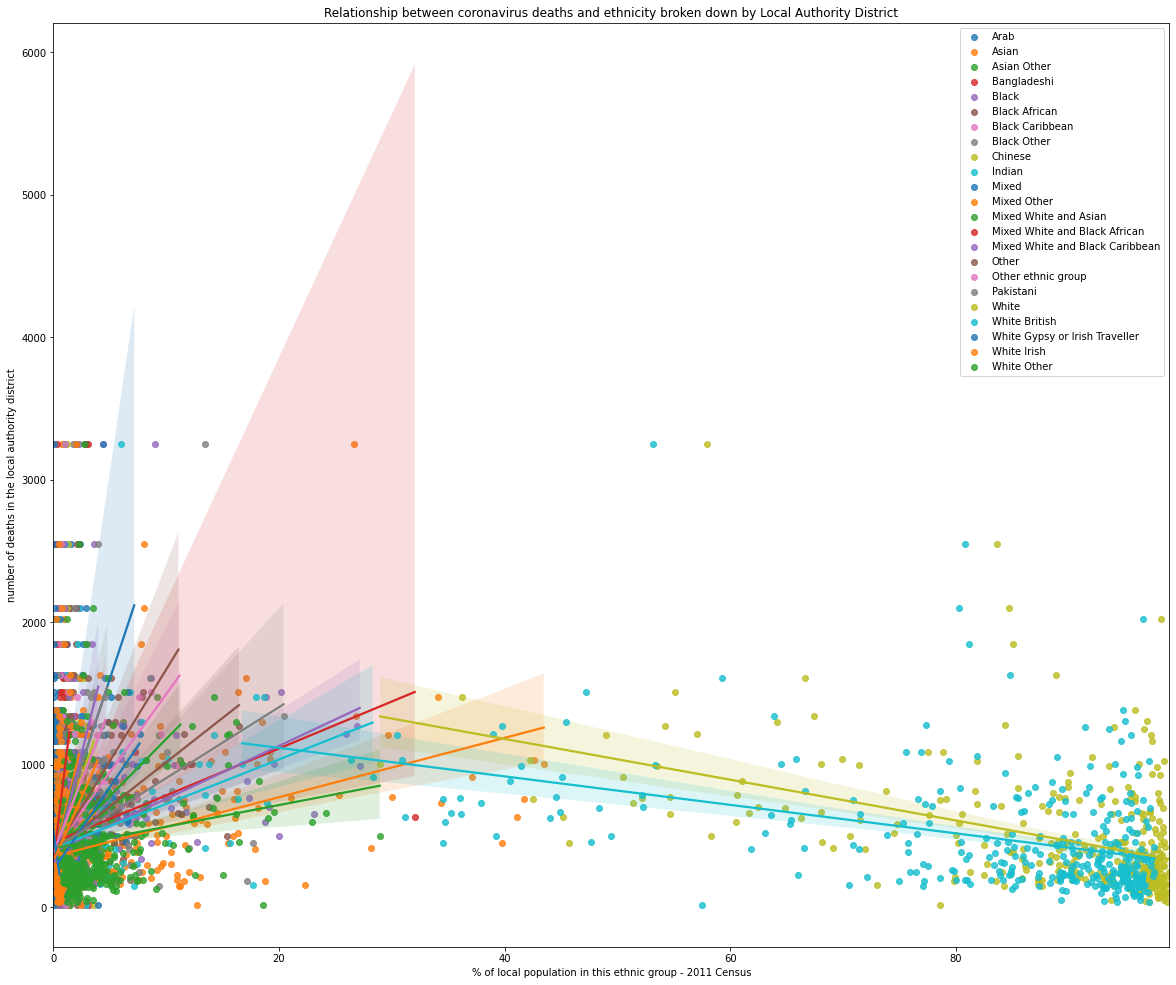

In [6]:
fig, ax = plt.subplots(figsize=(20,17))

corr_capture = {}
for i in ethnicity_df.columns[2:]: #itterate throught the ethnicities
    correlation = df[covid_df.columns[-1]].corr(df[i])
    corr_capture[i] = correlation
    
    ax = sns.regplot(x=i, y=covid_df.columns[-1], data=df, label=i)
    
ax.legend()
plt.legend(loc='upper right')
ax.set_title('Relationship between coronavirus deaths and ethnicity broken down by Local Authority District')
ax.set_xlabel('% of local population in this ethnic group - 2011 Census')
ax.set_ylabel('number of deaths in the local authority district')

plt.savefig("../reports/figures/regplot.png")

In [7]:
corr_capture

{'Arab': 0.35994410789573505,
 'Asian': 0.39693650314411744,
 'Asian Other': 0.32705701454571656,
 'Bangladeshi': 0.16704214930148664,
 'Black': 0.4037170260240842,
 'Black African': 0.36609066488919595,
 'Black Caribbean': 0.4058565605705353,
 'Black Other': 0.4193069442312207,
 'Chinese': 0.32893302258191537,
 'Indian': 0.27638564729342646,
 'Mixed': 0.3963305477510563,
 'Mixed Other': 0.3239020362078226,
 'Mixed White and Asian': 0.27491688845037265,
 'Mixed White and Black African': 0.3722379423586808,
 'Mixed White and Black Caribbean': 0.4269065825615713,
 'Other': 0.38368374688937795,
 'Other ethnic group': 0.3485860717266053,
 'Pakistani': 0.35058927724109923,
 'White': -0.45456250067221227,
 'White British': -0.4051097965831478,
 'White Gypsy or Irish Traveller': -0.13004685967173013,
 'White Irish': 0.2869986260216559,
 'White Other': 0.1530292419558356}

# Shape

In [8]:
geojson_path = "../data/geog/Local_Authority_Districts__December_2009__Boundaries.geojson"
if os.path.exists(geojson_path):
    print("Reading geoJSON locally")
    gdf1 = gpd.read_file(geojson_path)
else:
    print("Unable to locate geoJSON, downloading now. This may take a while")
    r = requests.get("https://opendata.arcgis.com/datasets/5e14c6bedc8740d19683517e5e902057_3.geojson")
    gdf = gpd.read_file(f.json())

Reading geoJSON locally


In [9]:
general = set(gdf1.lad09nm.unique())

In [19]:
import sys
print(sys.path)

['/Users/yusufsohoye/pythoncode/covid_bame/notebooks', '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/usr/local/Cellar/python/3.7.7/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages', '/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/IPython/extensions', '/Users/yusufsohoye/.ipython']


In [18]:
os.environ['PYTHONPATH'].split(os.pathsep)


KeyError: 'PYTHONPATH'

In [2]:
import os
os.getcwd()



'/Users/yusufsohoye/pythoncode/covid_bame/src/notebooks'

In [10]:
import sys
sys.path.insert(0, '..')
import data

In [11]:
data

<module 'data' from '../data/__init__.py'>

In [10]:
import pkgutil
search_path = ['..'] # set to None to see all modules importable from sys.path
all_modules = [x[1] for x in pkgutil.iter_modules(path=search_path)]
print(all_modules)


['data', 'features', 'models', 'visualization']
